## Champions League Data Analytics (2010-2022) ⚽️
- Data cleansing
- Descriptive Analytics
- Forecasting

## Import Dataset and Libraries

In [106]:
import pandas as pd
import numpy as np

df_attacking = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/attacking.csv')
df_attampts = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/attempts.csv')
df_defending = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/defending.csv')
df_disciplinary = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/disciplinary.csv')
df_distributon = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/distributon.csv')
df_goalkeeping = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/goalkeeping.csv')
df_goals = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/goals.csv')
df_key_stats = pd.read_csv(f'/Users/sandeepk/Desktop/DS_Workshop/Summer_Proj/UCL Datasets Folder/key_stats.csv')

In [177]:
#Recieve na reporting
ls = list(df_attacking.columns)
for x in ls:
  if sum(df_attacking[x].isna()) > 0:
    print(x)
    print(sum(df_attacking[x].isna()))
    print()

## User Input Based Aggregation
- GUI + UX
    - Display selected player & team total assists/dribbles 
    - Position average Comparison to selected player

In [254]:
choice = input('Which player Assists would you like to view? ')

ret = df_attacking[df_attacking['player_name'].str.contains(choice)]
ret1 = ret.loc[:,['player_name', 'position', 'match_played', 'assists']]
index = ret1['position'].iloc[0]

sub = df_attacking.groupby('position').agg({'assists':'mean'}).round(2)
ans = sub.loc[index]

ret1['Position_Avg'] = ans[0]
ret1


Which player Assists would you like to view? Bruno Fernandes


player_name    position  match_played  assists  Position_Avg
0  Bruno Fernandes  Midfielder             7        7          1.67

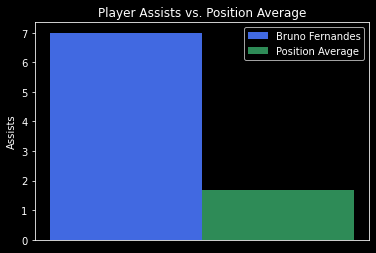

In [255]:
import matplotlib.pyplot as plt
N = 1
assi = list(ret1.iloc[:,3])
po_avg = list(ret1.iloc[:,4])

name = list(ret1.iloc[:,0
])

player_avg = (assi[0])


ind = np.arange(N)  
width = 0.25      

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, player_avg, width, color='royalblue')


pos_avg = (po_avg[0])

rects2 = ax.bar(ind+width, pos_avg, width, color='seagreen')

# add some
ax.set_ylabel('Assists')
ax.set_title('Player Assists vs. Position Average')

ax.set_xticks(ind + width / 0.01)
ax.set_xticklabels

ax.legend( (rects1[0], rects2[0]), (name[0], 'Position Average') )

plt.show()

```GUI```

In [147]:
import tkinter
import tkinter.messagebox

class PlayerSearchGUI:
    def __init__(self):
        self.main_window = tkinter.Tk()
        self.top_frame = tkinter.Frame(self.main_window)
        self.bottom_frame = tkinter.Frame(self.main_window)
        
        self.prompt_label = tkinter.Label(self.top_frame,
                                         text='Enter a player name')
        self.player_entry = tkinter.Entry(self.top_frame,
                                         width=10)
        
        self.prompt_label.pack(side='left')
        self.player_entry.pack(side='left')
        
        self.assist_button = tkinter.Button(self.bottom_frame,
                                            text = 'Assists',
                                            command = self.assists)
        self.dribble_button = tkinter.Button(self.bottom_frame,
                                            text = 'Dribbles',
                                            command = self.drb)
        self.goals_button = tkinter.Button(self.bottom_frame,
                                          text = 'Goals',
                                          command = self.goals)
        self.quit_button = tkinter.Button(self.bottom_frame,
                                         text = 'Quit',
                                         command = self.main_window.destroy)
        
        self.assist_button.pack(side='left')
        self.dribble_button.pack(side='left')
        self.goals_button.pack(side='left')
        
        self.quit_button.pack(side='left')
        
        self.top_frame.pack()
        self.bottom_frame.pack()
        
        tkinter.mainloop()
        
    def assists(self):
        choice = self.player_entry.get()
        ret = df_attacking[df_attacking['player_name'].str.contains(choice)]
        ret1 = ret.loc[:,['player_name', 'position', 'match_played', 'assists']]
        index = ret1['position'].iloc[0]

        sub = df_attacking.groupby('position').agg({'assists':'mean'}).round(2)
        z = list(ret1.loc[:, 'assists'])
        tkinter.messagebox.showinfo('Assists:', z[0])
        
    def drb(self):
        choice1 = self.player_entry.get()
        ret = df_attacking[df_attacking['player_name'].str.contains(choice1)]
        ret3 = ret.loc[:,['player_name', 'dribbles']]
        y = list(ret1.loc[:, 'dribbles'])
        tkinter.messagebox.showinfo('Dribbles:',y[0])
    
    def goals(self):
        choice2 = self.player_entry.get()
        ret = df_goals[df_goals['player_name'].str.contains(choice2)]
        ret5 = ret.loc[:,['player_name', 'goals']]
        g = list(ret5.loc[:, 'goals'])
        tkinter.messagebox.showinfo('Goals:',g[0])
        
        #Can Expand to Defense, etc.
player_search = PlayerSearchGUI()
        

In [179]:
#Team Assist Statistics

club_ls = list(df_attacking['club'].unique())
i = 1
for x in club_ls:
    print(f'{i}) {x}')
    i+=1
choice = int(input("Which team assists would you like to view? "))
z = club_ls[choice-1]
df_club_sum = df_attacking.groupby('club').agg({'assists': 'sum'})
df_club_sum[df_club_sum.index == z]

1) Man. United
2) Real Madrid
3) Bayern
4) Ajax
5) Liverpool
6) Man. City
7) Benfica
8) Paris
9) Villarreal
10) Wolfsburg
11) Leipzig
12) Dortmund
13) Atalanta
14) Sheriff
15) Chelsea
16) Beşiktaş
17) Juventus
18) Sporting CP
19) Zenit
20) Salzburg
21) Atlético
22) LOSC
23) Inter
24) Club Brugge
25) Young Boys
26) Dynamo Kyiv
27) Sevilla
28) Shakhtar Donetsk
29) Milan
30) Porto
31) Barcelona
32) Malmö
Which team assists would you like to view? 2


assists
club                
Real Madrid       21

# Top 5 Assists and Scorers in CL
        - Assist Per Match and Goals Per Match Statistics
        - Performance statistics

In [356]:
#Initiate Assists Per Match Statistic
df_attacking['APM'] = (df_attacking['assists']/df_attacking['match_played']).round(2)

#Aggregate top Assists players + APM
df_top_assists = df_attacking.groupby('player_name').agg({'assists':'sum', 'APM':'sum'})
df_top_assists.sort_values(by=['assists'], ascending=False, inplace=True)
top5_assists = df_top_assists.head(5)
top5_assists

assists   APM
player_name                    
Bruno Fernandes         7  1.00
Vinícius Júnior         6  0.46
Sané                    6  0.60
Antony                  5  0.71
Alexander-Arnold        4  0.44

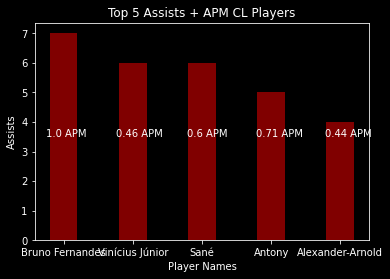

In [357]:
#Bar Graph Visualization of top 5 Assist + APM CL Players

#Data
x = top5_assists.index
y = top5_as 

#plt.plot(x, y, color = 'm')
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.title('Top 5 Assists + APM CL Players')
plt.ylabel('Assists')
plt.xlabel('Player Names')

# Add text
plt.text(-0.25, 3.5, f'{df_top_assists.iloc[0,1]} APM')
plt.text(.75, 3.5, f'{df_top_assists.iloc[1,1]} APM')
plt.text(1.78, 3.5, f'{df_top_assists.iloc[2,1]} APM')
plt.text(2.78, 3.5, f'{df_top_assists.iloc[3,1]} APM')
plt.text(3.78, 3.5, f'{df_top_assists.iloc[4,1]} APM')
# Display Graph
plt.show()

In [81]:
df_goals['GPM'] = (df_goals['goals']/df_goals['match_played']).round(2)
gls = df_goals.groupby('player_name').agg({'goals':'sum', 'GPM': 'sum'})
top5_goals = gls.sort_values(by='goals', ascending=False).head(5)
top5_goals

goals   GPM
player_name             
Benzema         15  1.25
Lewandowski     13  1.30
Haller          11  1.38
Salah            8  0.62
Nkunku           7  1.17

In [93]:
gls_attributes = df_goals.groupby('player_name').agg({'goals':'sum', 'right_foot':'sum', \
                                                     'left_foot': 'sum', 'headers':'sum', \
                                                     'others': 'sum'})
gls_attributes1 = gls_attributes.sort_values(by='goals', ascending=False).head(5)

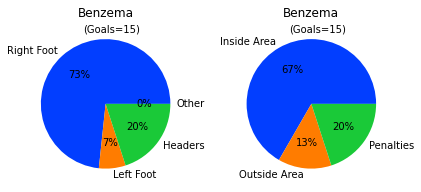

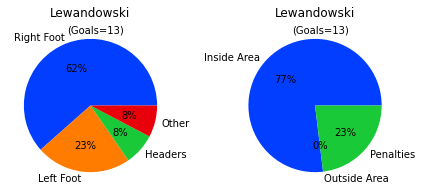

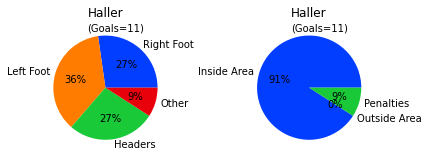

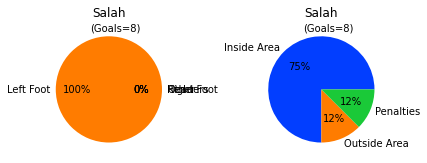

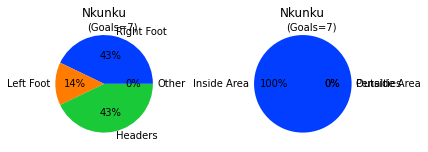

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
for t in range(5):
    plt.subplot(1,2,1)
    x = list(gls_attributes1.iloc[t,1:])
    data = x
    labels = ['Right Foot', 'Left Foot', 'Headers', 'Other']

    #define Seaborn color palette to use
    colors = sns.color_palette('bright')[0:4]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title(gls_attributes1.index[t])
    plt.text(-.35, 1.1, f'(Goals={top5_goals.iloc[t,0]})')
    
    plt.subplot(1,2,2)
    df_goals1 = df_goals.copy()
    df_goals1['inside_area'] = df_goals1['inside_area'] - df_goals1['penalties']
    dist_attributes = df_goals1.groupby('player_name').agg({'goals':'sum', 'inside_area':'sum', \
                                                     'outside_areas': 'sum', 'penalties':'sum'})
    dist_attributes1 = dist_attributes.sort_values(by='goals', ascending=False).head(5)
    x1 = list(dist_attributes1.iloc[t,1:])
    labels = ['Inside Area', 'Outside Area', 'Penalties']
    plt.pie(x1, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title(gls_attributes1.index[t])
    plt.text(-.35, 1.1, f'(Goals={top5_goals.iloc[t,0]})')
    plt.tight_layout()
    plt.show()


# Scatter Viz Goals VS Matches Played

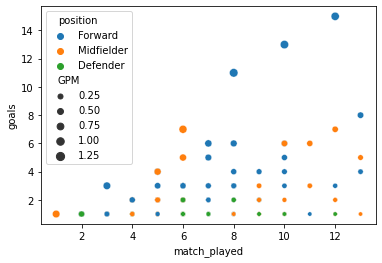

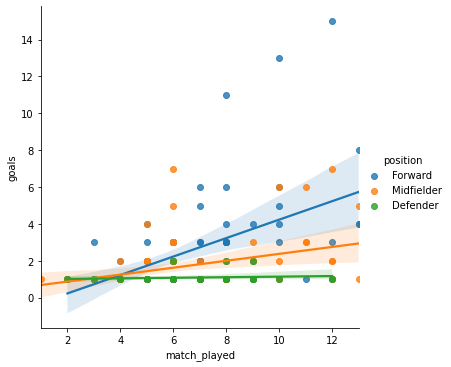

In [115]:
#Scatter
sns.scatterplot(data=df_goals, x="match_played", y="goals", 
                hue="position", size="GPM")

sns.lmplot(x="match_played", y="goals", hue="position", data=df_goals)

## LR Model 
- Predictors: Position, Match Played
- Target: Goals
- Performance Evaluation

In [70]:
df_goals2 = df_goals.copy()
df_goals2['position'].replace(['Forward', 'Midfielder', 'Defender'],
                        [1, 2, 3], inplace=True)

In [71]:
df_goals['position'].unique()

array(['Forward', 'Midfielder', 'Defender'], dtype=object)

In [72]:
#Development of Model
from sklearn.linear_model import LinearRegression

x = df_goals2[['position', 'match_played']].values
y = df_goals2['goals']

goal_model = LinearRegression().fit(x, y)

In [73]:
#Coefficients and Intercept
print('Coefficient (Position)=', goal_model.coef_[0])
print('Coefficient (Matches Played)=', goal_model.coef_[1])
print('Intercept=', goal_model.intercept_)

Coefficient (Position)= -0.8056323702784632
Coefficient (Matches Played)= 0.29440035284894384
Intercept= 1.4384769320963


In [74]:
#Ex. Prediction
goal_model.predict([[1,3]])[0].round(2)

1.52

In [61]:
# UX Prediction
print('Options')
print('--------')
uniq_p = df_goals['position'].unique()
for x in range(3):
    print(f'{x+1}) {uniq_p[x]}')
choice = int(input('Enter Position:' ))
choice1 = int(input('Enter Match Played:' ))
print('Estimated Goals:', goal_model.predict([[choice,choice1]])[0].round(0
                                                                         ))


Options
--------
1) Forward
2) Midfielder
3) Defender
Enter Position:1
Enter Match Played:7
Estimated Goals: 3.0


In [86]:
df_goals2['goal_pred'] = (goal_model.intercept_+ df_goals2['position']*goal_model.coef_[0] \
                              + df_goals2['match_played']*goal_model.coef_[1]).round(0)

In [85]:
#Performance Statistics
df_goals2['error'] = df_goals2['goals'] - df_goals2['goal_pred']
print('ME:', df_goals2['error'].mean())

df_goals2['sq_error'] = np.square(df_goals2['error'])
print('MSE:', df_goals2['sq_error'].mean())

ME: -0.01639344262295082
MSE: 3.087431693989071


In [93]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [102]:
#Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('goals ~ C(position + match_played)', data=df_goals2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


sum_sq     df         F    PR(>F)
C(position + match_played)  120.338555   12.0  2.787555  0.001702
Residual                    611.574013  170.0       NaN       NaN

## Disciplinary Statistics

In [156]:
df_disc1 = df_disciplinary.copy()
df_disc1 = df_disc1[df_disc1['match_played'] >=6]


df_disc1['RPM'] = (df_disc1['red']/df_disc1['match_played']).round(2)
df_disciplinary['tot_cards'] = df_disciplinary['red'] + df_disciplinary['yellow']
red_p = df_disc1[['player_name', 'red', 'RPM']]
red_p.sort_values(by='red', ascending=False).head(10)

#PLAYERS WITH HIGHEST RED CARDS PROVIDED 6+GAMES

player_name  red   RPM
10           Álvarez    4  0.57
6       Éder Militão    4  0.33
74             André    3  0.43
1             Capoue    3  0.25
55            Arnold    3  0.50
270    Matheus Nunes    3  0.50
23              Addo    3  0.50
117             Pino    3  0.43
27   Marcos Llorente    3  0.33
251          Dulanto    3  0.50

In [167]:
#df_disciplinary[df_disciplinary['player_name'] == 'Álvarez']
r_club = df_disciplinary.groupby('club').agg({'red': sum, 'yellow': sum, 'tot_cards': \                        
                                             sum})
r_club = r_club.sort_values(by='red', ascending=False).head(10)

rindex = r_club.index
r_club['club1'] = r_club.index
r_club

red  yellow  tot_cards        club1
club                                            
Atlético      25       4         29     Atlético
Wolfsburg     25       2         27    Wolfsburg
Real Madrid   25       0         25  Real Madrid
Villarreal    24       2         26   Villarreal
LOSC          24       0         24         LOSC
Man. City     21       1         22    Man. City
Sevilla       20       2         22      Sevilla
Benfica       19       0         19      Benfica
Paris         19       0         19        Paris
Sporting CP   17       0         17  Sporting CP

Text(0.5, 1.0, 'CL Teams by Disciplanary Cards')

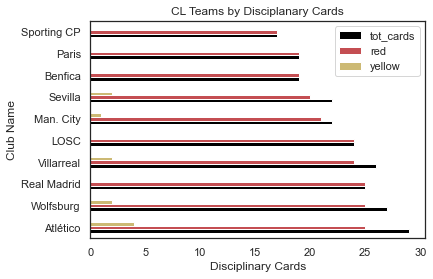

In [169]:
my_colors = ['black', 'r', 'y']*10
r_club.plot(x='club1', y=['tot_cards', 'red', 'yellow'], kind="barh", color=my_colors)
plt.ylabel('Club Name')
plt.xlabel('Disciplinary Cards')
plt.title('CL Teams by Disciplanary Cards')

## Defense Statistics
- Top defenders on basis of Accuracy

In [182]:
defense_df = df_defending[['player_name', 'club', 'position', \
             'balls_recoverd', 'tackles', 't_won', 't_lost']]

defense_df['tackle_success'] = (defense_df['t_won']/defense_df['tackles']).round(2)

defense_df = defense_df[defense_df['tackles'] >=10]
defense_df.sort_values(by='tackle_success', ascending=False, inplace=True)

defense_df.reset_index(inplace=True)

#Top ten
defense_df = defense_df.iloc[0:10]

#agg table
d = defense_df.groupby('position').agg({'tackle_success': 'mean'})
d.sort_values(by='tackle_success', ascending=False, inplace=True)
d.reset_index(inplace=True)

i=0
for val in defense_df['position'].unique():
    print(f'{val}: {sum(defense_df.position == val)} (Avg. Accuracy Rate: {d.iloc[i,1].round(3)})')
    i+=1
    
defense_df = df_defending[['player_name', 'club', 'position', \
             'balls_recoverd', 'tackles', 't_won', 't_lost', 'match_played']]

defense_df['tackle_success'] = (defense_df['t_won']/defense_df['tackles']).round(2)

defense_df = defense_df[defense_df['tackles'] >=10]
defense_df.sort_values(by='tackle_success', ascending=False, inplace=True)

defense_df.reset_index(inplace=True)

Midfielder: 4 (Accuracy Rate: 0.692)
Defender: 6 (Accuracy Rate: 0.675)


/var/folders/2n/y8fl7fr16hs_g_085s9fnpqm0000gn/T/ipykernel_74979/1444323845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense_df['tackle_success'] = (defense_df['t_won']/defense_df['tackles']).round(2)


In [190]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(defense_df, x="match_played", y="tackles",
         size="tackle_success", color="position",
         hover_name="player_name", log_x=True, size_max=30)
fig.show()

## SQL

[('Griezmann', 12, 4, 0.0),
 ('Luis Suárez', 8, 1, 0.0),
 ('Correa', 1, 1, 1.0),
 ('Correa', 9, 1, 0.0),
 ('De Paul', 13, 1, 0.0),
 ('Renan Lodi', 4, 1, 0.0),
 ('João Félix', 12, 1, 0.0)]

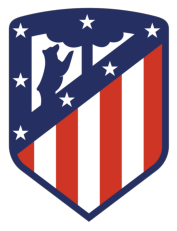

In [226]:
import sqlite3
import pandas as pd

con = sqlite3.connect("/Users/sandeepk/Desktop/test-DS/DS311-Technologies-in-Data-Analytic/Week_4_SQL_Queries/Lab_Assignment/data.sqllite")
cursor = con.cursor()

df_goals.to_sql('goals', con, if_exists='append', index = False)
df_attampts.to_sql('attempts', con, if_exists='append', index = False)


pic=imageio.imread('/Users/sandeepk/Downloads/Atletico Madrid.png')

plt.figure(figsize=(4,4))
plt.imshow(pic);
plt.axis('off');

#Your code here
query2 = """
Select DISTINCT(G.player_name), a.total_attempts, g.goals, ROUND(g.goals/a.total_attempts)

FROM goals g INNER JOIN attempts a ON g.player_name = a.player_name

WHERE g.club=='Atlético'
"""
cursor.execute(query2)
cursor.fetchall()



In [233]:
query3 = """
SELECT g.club, AVG(g.goals)

FROM goals g

WHERE g.club == 'Real Madrid'

GROUP BY club

"""

cursor.execute(query3)
cursor.fetchall()

[('Real Madrid', 4.666666666666667)]